### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Dataset

In [2]:
dataset=pd.read_csv('Nifty_vs_Mutual_Funds.csv')
dataset

,Nifty 50 Change,Mutual Funds Changes
0,0.00,0.00
1,0.00,0.00
2,271.65,237.16
3,179.55,89.12
4,120.60,128.29
...,...,...
312,-45.80,9.14
313,-128.80,-326.54
314,321.50,194.85
315,0.00,0.00


#### How big is the dataset? (Rows and columns)

In [3]:
dataset.shape

(317, 2)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nifty 50 Change       317 non-null    float64
 1   Mutual Funds Changes  317 non-null    float64
dtypes: float64(2)
memory usage: 5.1 KB


#### Data Pre-processing: Finding out NaN values

In [5]:
dataset.isna().any()

Nifty 50 Change         False
Mutual Funds Changes    False
dtype: bool

#### Rename specific columns

In [6]:
dataset.rename(columns = {'Nifty 50 Change':'nifty_50_change','Mutual Funds Changes':'mutual_funds_changes'},inplace = True)

In [7]:
#having a glance at the first five records of the dataset
dataset.head()

,nifty_50_change,mutual_funds_changes
0,0.00,0.00
1,0.00,0.00
2,271.65,237.16
3,179.55,89.12
4,120.60,128.29


### Importing the ML Libraries

In [8]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [9]:
dataset

,nifty_50_change,mutual_funds_changes
0,0.00,0.00
1,0.00,0.00
2,271.65,237.16
3,179.55,89.12
4,120.60,128.29
...,...,...
312,-45.80,9.14
313,-128.80,-326.54
314,321.50,194.85
315,0.00,0.00


In [10]:
dataset.shape

(317, 2)

In [11]:
#Independent Variable
X=dataset.iloc[:,:-1].values

#Dependent Variable
y=dataset.iloc[:,-1].values

In [12]:
X

array([[   0.  ],
       [   0.  ],
       [ 271.65],
       [ 179.55],
       [ 120.6 ],
       [-179.38],
       [  66.8 ],
       [   0.  ],
       [   0.  ],
       [ 190.6 ],
       [  52.45],
       [ 156.6 ],
       [  45.45],
       [  -2.05],
       [   0.  ],
       [   0.  ],
       [  52.35],
       [-195.05],
       [-174.65],
       [-181.4 ],
       [-139.85],
       [   0.  ],
       [   0.  ],
       [-468.05],
       [ 128.85],
       [   0.  ],
       [-167.8 ],
       [  -8.2 ],
       [   0.  ],
       [   0.  ],
       [ 237.9 ],
       [ 237.  ],
       [ 203.15],
       [-219.8 ],
       [ -43.9 ],
       [   0.  ],
       [   0.  ],
       [-302.7 ],
       [  53.15],
       [ 197.05],
       [ 142.05],
       [-231.1 ],
       [   0.  ],
       [   0.  ],
       [-531.95],
       [ 509.95],
       [ -30.25],
       [ -17.6 ],
       [ -28.3 ],
       [   0.  ],
       [   0.  ],
       [ -69.65],
       [-114.45],
       [ -28.95],
       [-815.3 ],
       [ 4

In [13]:
y

array([ 0.0000e+00,  0.0000e+00,  2.3716e+02,  8.9120e+01,  1.2829e+02,
       -5.8980e+01,  6.9670e+01,  0.0000e+00,  0.0000e+00,  1.0670e+02,
        3.8180e+01,  2.6180e+01,  5.3780e+01,  1.0344e+02,  0.0000e+00,
        0.0000e+00,  5.5350e+01, -2.8192e+02, -1.4408e+02, -7.7900e+01,
       -2.7101e+02,  0.0000e+00,  0.0000e+00, -6.5590e+02,  1.7650e+02,
        0.0000e+00, -1.8704e+02,  6.6990e+01,  0.0000e+00,  0.0000e+00,
        2.2014e+02,  2.7296e+02,  2.5161e+02, -1.2348e+02,  3.1900e+00,
        0.0000e+00,  0.0000e+00, -2.4645e+02, -9.9600e+01,  2.0361e+02,
        8.6830e+01, -2.8760e+02,  0.0000e+00,  0.0000e+00, -6.2791e+02,
        4.5264e+02, -3.1810e+01, -7.0900e+01, -1.3501e+02,  0.0000e+00,
        0.0000e+00, -2.2793e+02, -1.6272e+02,  5.9710e+01, -9.2659e+02,
        6.3164e+02,  0.0000e+00,  0.0000e+00,  1.9384e+02,  0.0000e+00,
       -1.0937e+02, -4.4360e+01, -3.8122e+02,  0.0000e+00,  0.0000e+00,
       -4.3464e+02,  2.2024e+02,  3.7477e+02,  2.6861e+02,  4.63

### Splitting the dataset (Training and Testing)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test =train_test_split(X,y,test_size=1/3, random_state=0)

In [15]:
X_train

array([[  49.85],
       [   0.  ],
       [ -14.75],
       [   5.4 ],
       [   0.  ],
       [ -54.65],
       [   0.  ],
       [   0.  ],
       [-331.55],
       [   0.  ],
       [   0.  ],
       [  -4.6 ],
       [   0.  ],
       [   0.  ],
       [-531.95],
       [  36.45],
       [ -60.1 ],
       [   0.  ],
       [ -19.  ],
       [ 127.6 ],
       [-220.65],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [-174.65],
       [   0.  ],
       [-169.45],
       [   0.  ],
       [ 229.3 ],
       [   0.  ],
       [ 133.2 ],
       [ -51.45],
       [-207.  ],
       [ -69.75],
       [ -82.5 ],
       [-142.5 ],
       [   0.  ],
       [ 154.45],
       [ 258.55],
       [  52.35],
       [ 311.7 ],
       [ 177.9 ],
       [ 181.8 ],
       [-226.5 ],
       [ 456.75],
       [ 120.6 ],
       [-168.1 ],
       [   0.  ],
       [-107.9 ],
       [ 331.9 ],
       [   0.  ],
       [-276.3 ],
       [ 119.  ],
       [   0.  ],
       [   0.  ],
       [ 1

### Training the Simple Regression Model

In [16]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

### Prediction of Testing dataset

In [17]:
y_pred=reg.predict(X_test)

In [18]:
y_pred

array([  -1.20742225,  208.16047443,  491.68075207,  159.34599207,
         -1.20742225,  -85.08667423, -196.22518204,    4.85686154,
         -1.20742225,   -1.20742225,  -62.57076908,  150.51975725,
         -1.20742225,   -1.20742225,   -1.20742225,  273.36653574,
        -52.00330426,  217.70721821,  -53.68449185,  373.87753633,
       -202.70976273,  150.09946035,  215.30552166, -322.73454777,
         -8.59263914,  122.47995004,   -1.20742225,   -1.20742225,
       -226.90685546, -374.73127806,   -1.20742225,   -1.20742225,
        345.41743222, -138.64450728,   53.37113183,  104.10697144,
        172.67540792,  -90.55053388,  170.93417792, -107.54253696,
        -21.80197016, -460.1716328 ,   -1.20742225,   66.82063251,
        108.55011005,  499.54630826,   10.3807636 ,   -1.20742225,
         73.30521319,   -1.20742225, -185.17737792,   31.75586289,
         -1.20742225, -235.43287821,  409.72285732,   -1.20742225,
        172.13502619, -118.77046833,   -1.20742225,  179.28007

### Visualising the results

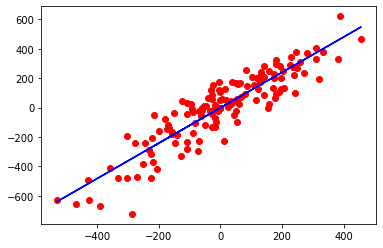

In [19]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train, reg.predict(X_train), color='blue')

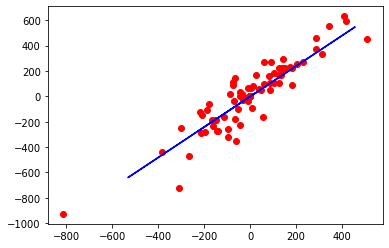

In [20]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train, reg.predict(X_train), color='blue')

In [21]:
#Coefficient
b=reg.coef_

In [22]:
b

array([1.20084827])

In [23]:
#Intercept
a=reg.intercept_

In [24]:
a

-1.2074222470348488

In [28]:
reg.predict([[-189.60]])

array([-228.88825511])

In [26]:
((22.03+25.88)/25.88)*100

185.12364760432766

In [27]:
2.50

2.5